# euporie

Welcome to this demo of `euporie`, a terminal based interactive development environment for Jupyter notebooks.

- Use the arrow keys or the mouse to navigate between cells
- Use `[` and `]` (or the mouse wheel) to scroll up and down
- Press `Enter` to edit a cell
- Press `Esc Esc` to stop editing a cell
- Press `Ctrl+e` to execute or render a cell, or `Ctrl+r` to run a cell and select the next cel

---

## Markdown

`euporie` will render the _markdown cells_ in your notebook:

> - This includes rendering blocks, list, and inline styles
> - *Like* **this**

This also includes rendering tables:


| Item       | Can `euporie` display it? |
|-----------:|:--------------------------|
| **Markdown** | Yes
| **Tables** | Yes
| **LaTeX**  | Yes

It can also render LaTex maths equations in markdown cells:

$$
s = ut + \frac{1}{2} a t^2
$$

$$
x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}
$$

$$
f(s) = \sum_{i = 0}^{\infty} \frac{f^{(i)}(0)}{i!} x^i
$$

## Cell Output

`euporie` also renders rich cell output, including Markdown, HTML, and images. This means you can use libraries like `pandas`, and display dataframes as you would expect:

In [1]:
from IPython.display import *

display({"text/markdown": "Regular *Italic* **Bold**"}, raw=True)

Regular *Italic* **Bold**

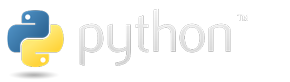

In [2]:
import urllib.request
data = urllib.request.urlopen("https://www.python.org/static/img/python-logo.png").read()
Image(data)

This means you can use libraries like `pandas`, and display dataframes as you would expect:

In [2]:
import pandas as pd
import numpy as np

x = np.arange(20_000)

df = pd.DataFrame(
    {
        col: np.random.beta(i+1, 3, x.shape)
        for col, i in zip("abcd", [0, 2, 4, 6])
    },
    index = x,
)
df.head()

,a,b,c,d
0,0.269840,0.492687,0.516047,0.519997
1,0.328014,0.335162,0.756093,0.845504
2,0.081086,0.703908,0.347426,0.777820
3,0.101227,0.397597,0.686828,0.764267
4,0.066236,0.883462,0.641823,0.554576


`euporie` can render images using Sixel graphics if your terminal supports it. Otherwise it will fall back to using character-based terminal graphics.

This means you can produce plots with `matplotlib` and `euporie` will display them in the best way it can:

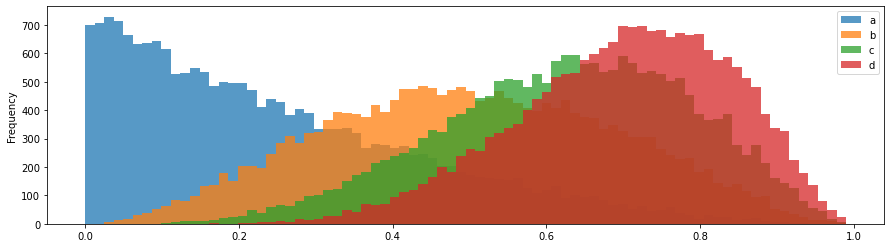

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15, 4), facecolor="#FFF")
df.plot.hist(ax=ax, bins=80, alpha=0.75)
plt.show()

If your terminal does not support graphics, the excellent `plotext` library works very well with euporie:

In [5]:
import plotext as plt

plt.clear_figure()
plt.plot_size(100, 15)
for name, col in df.items():
    plt.hist(col.values, 80, label=name)
plt.title("Histogram Plot")
plt.show()

                                  Histogram Plot                                
     ┌─────────────────────────────────────────────────────────────────────────┐
733.0┤ ▖▖▖ a                                                                   │
     │ ▖▖▖ b ▖                                             ▗▖█▙▄               │
610.8┤ ▖▖▖ c █▙▖                                     ▗▖▄▄█▙███████             │
488.7┤ ▖▖▖ d ████▟█▄▖                  ▄▖ ▄▗▄▖ ▗▖▄██████████████████▌          │
     │       ██████████▙▄▄     ▄▄▖▄▄▟▌▐██████████████████████████████▙         │
366.5┤█████████████████████▐█▄▄████████████████████████████████████████▄       │
     │██████████████████████████████████████████████████████████████████▄▖     │
244.3┤████████████████████████████████████████████████████████████████████     │
122.2┤█████████████████████████████████████████████████████████████████████    │
     │██████████████████████████████████████████████████████████████████████▙▖ │
  0.0┤██████████████████████

It can also display SVG output:

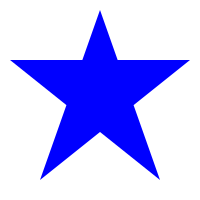

In [6]:
from IPython.display import SVG
SVG('<svg width="200" height="200"><polygon points="100,10 40,180 190,60 10,60 160,180" fill="blue" /></svg>')

`euoporie` can response to requests for user input from the kernel (press enter to send your input):

In [6]:
name = input("Enter your name:")
print(f"Hello {name}")

Hello Josiah


`euporie` works with `tqdm`, so you can display progress-bars in your notebooks:

In [7]:
import time
from tqdm import tqdm

for i in tqdm(range(20), ncols=100):
    time.sleep(0.2)

100%|███████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.97it/s]


And can display colorful ANSI output from command line programs:

In [8]:
!ls -l --color=always

drwxr-xr-x josiah josiah 4.0 KB Mon Jan 10 14:57:41 2022  __pycache__
.rw-r--r-- josiah josiah 1.3 KB Fri Jan 14 08:39:07 2022  CHANGELOG.rst
drwxr-xr-x josiah josiah 4.0 KB Fri Jan 14 08:29:30 2022  dist
drwxr-xr-x josiah josiah 4.0 KB Fri Jan 14 08:57:41 2022  euporie
.rw-r--r-- josiah josiah 1.1 KB Fri May 21 07:59:37 2021  LICENSE
.rw-r--r-- josiah josiah  64 MB Fri Jan 14 09:40:15 2022  log.log
drwxr-xr-x josiah josiah 4.0 KB Wed Jun 30 09:24:27 2021  media
.rw-r--r-- josiah josiah 4.0 KB Wed Jan  5 17:12:18 2022  noxfile.py
.rw-r--r-- josiah josiah 144 KB Fri Jan 14 08:39:07 2022  poetry.lock
.rw-r--r-- josiah josiah 4.0 KB Thu Jun 17 21:30:37 2021  publish.log
.rw-r--r-- josiah josiah 1.6 KB Fri Jan 14 08:39:07 2022  pyproject.toml
.rw-r--r-- josiah josiah  13 KB Thu Jan  6 10:26:20 2022  README.md
drwxr-xr-x josiah josiah 4.0 KB Thu Jan 13 17:47:55 2022  scripts
drwxr-xr-x josiah josiah 4.0 KB Thu Jan 13 17:47:55 2022  tests
.rw-r--r-- josiah josiah 2.9 KB Fri Jan